In [1]:
import sys
fc_src = "../.."
sys.path.insert(0, fc_src)

import requests
from os import path
from tqdm.notebook import tqdm
import pandas as pd
import time
import glob
import logging
logging.getLogger().setLevel(logging.ERROR)

from rdflib import ConjunctiveGraph, Namespace, URIRef
from rdflib.namespace import RDF, RDFS
schema = Namespace("http://schema.org/")

from metrics.WebResource import WebResource
from metrics.FAIRMetricsFactory import FAIRMetricsFactory
from metrics.AbstractFAIRMetrics import AbstractFAIRMetrics

/home/trosnet/miniconda3/envs/fair-checker-env/lib/python3.8/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 101.0.4951
[WDM] - Get LATEST driver version for 101.0.4951
[WDM] - Get LATEST driver version for 101.0.4951
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_linux64.zip
[WDM] - Driver has been saved in cache [/home/trosnet/.wdm/drivers/chromedriver/linux64/101.0.4951.41]


# Iterate over splits

In [2]:
import glob

input_files = glob.glob("../data/split_*.ttl")

for filename in tqdm(input_files):
    !python biotools_experimental_sudy-by_split_all_no_F1A_A11.py $filename &>/dev/null 

  0%|          | 0/26 [00:00<?, ?it/s]

In [3]:
metrics_collection = []
# metrics_collection.append(FAIRMetricsFactory.get_F1A(None))
metrics_collection.append(FAIRMetricsFactory.get_F1B(None))
metrics_collection.append(FAIRMetricsFactory.get_F2A(None))
metrics_collection.append(FAIRMetricsFactory.get_F2B(None))
metrics_collection.append(FAIRMetricsFactory.get_I1(None))
metrics_collection.append(FAIRMetricsFactory.get_I2(None))
metrics_collection.append(FAIRMetricsFactory.get_I3(None))
metrics_collection.append(FAIRMetricsFactory.get_R11(None))
metrics_collection.append(FAIRMetricsFactory.get_R12(None))
metrics_collection.append(FAIRMetricsFactory.get_R13(None))

df_columns = ['ID']
for m in metrics_collection:
    df_columns.append(m.get_principle_tag())

exec_time_df = pd.DataFrame(columns=df_columns)

In [4]:
all_files = glob.glob("../results/biotools_all/FC_results_split_*.csv")

li = []

for filename in tqdm(all_files):
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

  0%|          | 0/26 [00:00<?, ?it/s]

../results/biotools_all/FC_results_split_24.ttl.csv
../results/biotools_all/FC_results_split_23.ttl.csv
../results/biotools_all/FC_results_split_25.ttl.csv
../results/biotools_all/FC_results_split_11.ttl.csv
../results/biotools_all/FC_results_split_3.ttl.csv
../results/biotools_all/FC_results_split_2.ttl.csv
../results/biotools_all/FC_results_split_15.ttl.csv
../results/biotools_all/FC_results_split_21.ttl.csv
../results/biotools_all/FC_results_split_22.ttl.csv
../results/biotools_all/FC_results_split_1.ttl.csv
../results/biotools_all/FC_results_split_13.ttl.csv
../results/biotools_all/FC_results_split_7.ttl.csv
../results/biotools_all/FC_results_split_5.ttl.csv
../results/biotools_all/FC_results_split_12.ttl.csv
../results/biotools_all/FC_results_split_20.ttl.csv
../results/biotools_all/FC_results_split_4.ttl.csv
../results/biotools_all/FC_results_split_8.ttl.csv
../results/biotools_all/FC_results_split_10.ttl.csv
../results/biotools_all/FC_results_split_16.ttl.csv
../results/biotools

In [5]:
from upsetplot import generate_counts, from_contents, generate_samples, UpSet, plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 


F1B = df[((df["F1B"].astype(int) > 0))]["ID"]
F2A = df[((df["F2A"].astype(int) > 0))]["ID"]
F2B = df[((df["F2B"].astype(int) > 0))]["ID"]

I1 = df[((df["I1"].astype(int) > 0))]["ID"]
I2 = df[((df["I2"].astype(int) > 0))]["ID"]
I3 = df[((df["I3"].astype(int) > 0))]["ID"]

R11 = df[((df["R1.1"].astype(int) > 0))]["ID"]
R12 = df[((df["R1.2"].astype(int) > 0))]["ID"]
R13 = df[((df["R1.3"].astype(int) > 0))]["ID"]

df_upset = from_contents({'F1B': F1B, 
                          'F2A': F2A, 
                          'F2B': F2B,
                          'I1': I1, 
                          'I2': I2,
                          'I3': I3, 
                          'R11': R11, 
                          'R12': R12,
                          'R13': R13})
df_upset

id
F1B   F2A  F2B  I1   I2   I3   R11   R12   R13                                   
True  True True True True True True  False True        https://bio.tools/2020plus
                               False False True            https://bio.tools/3CDB
                                           True    https://bio.tools/3_aqtl-atlas
                                           True       https://bio.tools/3d-phovis
                                           True         https://bio.tools/3d-pssm
...                                                                           ...
False True True True True True True  False True    https://bio.tools/wrap_n_shake
                               False False True           https://bio.tools/xmwas
                                           True  https://bio.tools/xtandem_parser
                                           True            https://bio.tools/zika
                                           True  https://bio.tools/zincidentifier

[25048 rows x 1 columns]

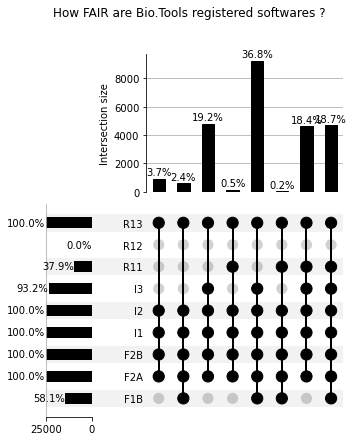

In [6]:
upset = UpSet(df_upset, subset_size='count', sort_categories_by=None, orientation='horizontal', show_percentages=True)

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 

params = {'legend.fontsize': 8}
with plt.rc_context(params):
    upset.plot()
plt.suptitle("How FAIR are Bio.Tools registered softwares ?")
plt.savefig('../results/biotools_all_no_F1A_A11', format="png")
plt.show()